In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [20]:
sample_dataset_path = ".\\sample-dataset"
model_path = ".\\models\\model_1.hdf5" # model_2, model_3, model_4
csv_path = ".\\data.csv"

### Choose image to categorize (0-35) and run all cells
The results are displayed at the end of the notebook.

In [21]:
img_no = 29

In [22]:
# load image names into a list
imgs = []
for path in os.listdir(sample_dataset_path):
    if os.path.isfile(os.path.join(sample_dataset_path, path)):
        imgs.append(path)
imgs[img_no]

'ISIC_0286360.jpg'

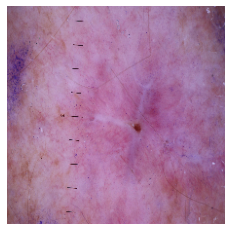

In [23]:
# load image
img = image.load_img(sample_dataset_path + "\\" + imgs[img_no], target_size=(224, 224))
img_tensor = image.img_to_array(img)                    # (height, width, channels)
img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

plt.imshow(img_tensor[0])                           
plt.axis('off')
plt.show()

In [24]:
# load model
model = load_model(model_path, compile=False)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [25]:
# compile model
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy'
)

### Predicted label:

In [26]:
# predict
pred = model.predict(img_tensor)
pred = pred[0]
ben = round(pred[0] * 100, 2)
mal = round(pred[1] * 100, 2)
print ("Benign: {}%\nMalignant: {}%".format(ben, mal))

1/1 [==============================] - 1s 1s/step
Benign: 41.75%
Malignant: 58.25%


### True label:

In [27]:
# check csv for true label
df = pd.read_csv(csv_path)
df['image_filename'] = df['image_name'].astype(str) + ".jpg"
img_filter = df['image_filename'] == imgs[img_no]
true = df['benign_malignant'].where(img_filter).dropna()
true

607    malignant
Name: benign_malignant, dtype: object